Este projeto é um algoritmo de Machine Learning para Regressão Linear. Os dados usados são de um dataset de avaliação de qualidade de vinhos.
Informações a respeito do dataset (encontrado em: http://www3.dsi.uminho.pt/pcortez/wine/):

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
              [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
              [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib


In [1]:
#Importando os pacotes
import numpy as np
import pandas as pd

In [2]:
# Versões das bibliotecas usadas
print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))

pandas : 1.2.3
numpy : 1.20.1


In [3]:
#Importando os dados
df = pd.read_csv("dataset/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Estatísticas dos dados
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#Dividindo em dados de treino e dados de teste
df_train = df.sample(frac = 0.5)
df_test = df.drop(df_train.index)

In [6]:
#Separando em X e y
X_train_df = df_train.loc[:, 'fixed acidity':'alcohol']
X_test_df = df_test.loc[:, 'fixed acidity':'alcohol']
y_train_df = df_train[["quality"]]
y_test_df = df_test[["quality"]]
print(X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape)

(800, 11) (799, 11) (800, 1) (799, 1)


In [7]:
# Normalizando os dados de X 
X_normalized_train = (X_train_df-X_train_df.mean())/X_train_df.std()
X_normalized_test = (X_test_df-X_train_df.mean())/X_train_df.std()

In [8]:
#Verificar se as colunas possuem média = 0 e std = 1
X_normalized_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-1.472711e-15,2.487177e-15,-4.352074e-16,1.907502e-16,-5.469930e-16,-1.970646e-17,-6.827872e-17,-2.754287e-13,-3.171130e-14,-5.091394e-15,-9.708415e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.074794e+00,-2.245140e+00,-1.424038e+00,-1.102673e+00,-1.750691e+00,-1.384976e+00,-1.283907e+00,-3.452820e+00,-2.947549e+00,-1.946658e+00,-1.880474e+00
25%,-6.970173e-01,-7.637651e-01,-9.138817e-01,-4.362544e-01,-3.938382e-01,-8.203276e-01,-8.030728e-01,-5.974073e-01,-6.791443e-01,-6.493284e-01,-8.598850e-01
50%,-2.285732e-01,-5.051075e-02,-9.763121e-02,-2.363287e-01,-1.598981e-01,-2.556796e-01,-2.581277e-01,-1.354884e-02,-3.102854e-02,-2.365416e-01,-3.032000e-01
75%,5.154263e-01,6.078779e-01,8.206506e-01,3.023875e-02,7.989054e-02,4.971843e-01,5.112066e-01,5.498682e-01,6.170872e-01,4.121234e-01,6.246083e-01
max,3.987424e+00,5.765256e+00,2.606198e+00,8.627040e+00,7.840853e+00,5.296692e+00,3.652655e+00,3.507488e+00,4.505782e+00,7.783316e+00,3.315253e+00


In [9]:
#Verificar os dados de X_test
X_normalized_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,-0.049755,-0.015215,-0.083329,-0.021098,0.029567,0.029766,0.026642,-0.081646,-0.047657,-0.023174,-0.007072
std,0.917189,0.965072,0.986399,0.875467,1.194133,0.968895,1.106811,0.926413,1.001265,0.999641,0.977940
min,-2.019683,-2.025677,-1.424038,-1.102673,-1.236022,-1.196760,-1.283907,-3.452820,-3.725288,-1.710780,-1.880474
25%,-0.697017,-0.708899,-0.964897,-0.436254,-0.393838,-0.820328,-0.754989,-0.644678,-0.679144,-0.649328,-0.859885
50%,-0.256129,-0.050511,-0.148647,-0.236329,-0.183292,-0.161572,-0.290183,-0.069763,-0.095840,-0.236542,-0.210419
75%,0.460315,0.580445,0.718619,0.030239,0.074042,0.591292,0.511207,0.497487,0.487464,0.412123,0.531827
max,4.152757,4.393613,3.677527,7.494129,12.262321,4.920260,7.787827,3.257081,4.505782,7.901255,4.150280


É normal que a média e o desvio padrão de X_test não sejam 0 e 1, respectivamente, já que eles foram normalizados com os dados de X_train. Esse é o procedimento padrão em Regressão Linear.

In [10]:
#Convertendo os dados para arrays numpy
X_train = X_normalized_train.to_numpy()
X_test = X_normalized_test.to_numpy()
y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 11) (799, 11) (800, 1) (799, 1)


In [12]:
#Adicionando o termo de bias aos dados de X_train e X_test
X_train = np.vstack((np.ones(len(X_train)), X_train.T)).T
X_test = np.vstack((np.ones(len(X_test)), X_test.T)).T

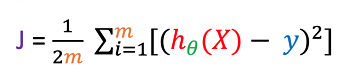

In [13]:
#Definindo a função de custo:

from IPython.display import Image
Image('images/cost_function.png')

In [14]:
#Calculando a função de custo
def cost_function(X, y, theta):
    '''
    
    Calcula o custo para X e Y. Objetos que precisamos:
    
    theta = Vetor de thetas (j, 1) - > inclui o peso do bias
    X     = Vetor de X's - shape = (m, j) -> X já inclui vetor de bias
    y     = Valor atual de y's - shape = (m, 1)
    
    onde:
        j é o número de features - 1 (1 é devido ao bias)
        m é o número de medições
    '''
    # número de exemplos de treino
    m = float(len(y))
    
    # inicializar J (o custo)
    J = 0 

    # Calcular h = X * theta 
    h = X.dot(theta)
    
    # Calcular o custo J
    J = 1/(2*m) * np.sum(np.square(h - y))
    
    return J

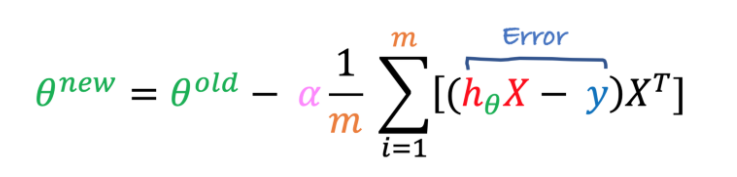

In [15]:
#Definindo a função de descida do gradiente:

Image('images/gradient_descent.png')

In [16]:
def gradient_descent(X, y, theta, learning_rate = 0.01, iterations = 100):
    '''
    
    Calcula o custo para X e Y. Objetos que precisamos:
    
    theta = Vetor de thetas (j, 1) - > inclui o peso do bias
    X     = Vetor de X's - shape = (m, j) -> X já inclui vetor de bias
    y     = Valor atual de y's - shape = (m, 1)
    
    onde:
        j é o número de features - 1 (1 é devido ao bias)
        m é o número de medições
    
    Retorna o vetor theta final e a matriz do histórico de custo sobre o número das iterações
    '''

    m = float(len(y))
    j = len(theta)
    
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, j))

    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - learning_rate * (1 / m) * np.dot(X.T, (prediction - y))
        theta_history[it,:] = theta.T
        cost_history[it] = cost_function(X, y, theta)
    
    return theta, cost_history, theta_history

In [18]:
# Taxa de aprendiado
lr = 0.05

# Número de iterações de treinamento
n_iter = 1000

# Inicializamos os parâmetros com valores aletórios
j = len(X_train[0])
theta = np.random.randn(j, 1)

# Treinamento
theta, cost_history, theta_history = gradient_descent(X_train, y_train, theta, lr, n_iter)

print(theta)
print('Custo Final/MSE:  {:0.3f}'.format(cost_history[-1]))

[[ 5.635     ]
 [ 0.14606001]
 [-0.22589578]
 [-0.06689472]
 [ 0.08226335]
 [-0.05812593]
 [ 0.04624519]
 [-0.09608226]
 [-0.13346323]
 [-0.03205595]
 [ 0.15324956]
 [ 0.274312  ]]
Custo Final/MSE:  0.199


In [20]:
#Testando o modelo com os dados de teste
cost_test = cost_function(X_test, y_test, theta)
print('Custo Final/MSE:  {:0.3f}'.format(cost_test))

Custo Final/MSE:  0.221
